# Assignment 1

For this assignment, you will read in a text file containing information about cities in the world, store the information about each city in its own object within a list, sort the list according to different attributes, write the results out to a file, and display part of the output file in a visualization on a world map. 

## Exercise 1
(3 points) Define a `City` class. Each `City` object will need instance variables to store the following information:
- The city's country code (a two-letter string)
- The city's name (a string)
- The city's region (a two-character string)
- The city's population (an int)
- The city's latitude (a float)
- The city's longitude (a float)
 

You will need five methods in the `City` class. The `__init__` method does the usual: it takes six parameters (plus self) and stores each in the appropriate instance variable. The `__str__` method returns a string consisting of the city's name, population, latitude, and longitude, separated by commas and with no spaces around the commas. For example, here's the string that `__str__` should return for a town in California (notice that the country code and region do not appear in this string):

`Berkeley,100158,37.8716667,-122.2716667. `

And then you will need three functions `getPopulation`, `getLatitude`, and `getName` that return the corresponding data values.

In [1]:
class City:
    '''A class that is intended to represent a city, with values for its country code, name, region, population, latitude, longitude.'''
    
    # Instantiate
    def __init__(self, code, name, region, pop, lat, long):
        # Country Code
        self.code = code
        # City Name
        self.__name = name 
        # City region
        self.region = region
        # City Population
        self.__pop = pop
        # City latitude
        self.__lat = lat
        # City longitude (unsure if this needs to be specifically private but it doesn't have a get so idk)
        self.long = long

    # to string method
    def __str__(self):
        return self.__name + ", " + str(self.__pop) + ", " + str(self.__lat) + ", " + str(self.long)

    #getpop
    def getPopulation(self):
        return self.__pop
    
    #getLat
    def getLatitude(self):
        return self.__lat

    #getName
    def getName(self):
        return self.__name

# Test cases
berk = City("US", "Berkeley", "CA", 100158, 37.8716667, -122.2716667)
print(berk)
print(berk.getPopulation())
print(berk.getLatitude())
print(berk.getName())

Berkeley, 100158, 37.8716667, -122.2716667
100158
37.8716667
Berkeley


## Exercise 2
 
 (3 points) The input file `world_cities.txt` consists of 47,913 lines. Each line has information about a world city, specifically the six attributes you'll store in the `City` object. These attributes are separated by commas without surrounding spaces, in the same order as enumerated above. Call the `split` method on each line of the file to separate it into its individual components. Then, call the `City` constructor with these components. Some of the instance variables are not strings, and so you will have to convert these strings to the appropriate types. Repeat this process for each line of `world_cities.txt` and build a list of 47,913 references to `City` objects.

In [2]:
# open world_cities.txt
worldcities = open('world_cities.txt', 'r')
# save contents in list of strings
citiesdata = worldcities.readlines()

#close file
worldcities.close()

# loop over each element
for i in range(len(citiesdata)):
    # strip and split each element to turn it into a list
    citiesdata[i] = (citiesdata[i].strip().split(","))

# printing to check values
#print(citiesdata)

# now create the list
listOfCities = []

# append each city object to the listOfCities
for eachcity in citiesdata:
    listOfCities.append(City(eachcity[0], eachcity[1], eachcity[2], int(eachcity[3]), float(eachcity[4]), float(eachcity[5])))

#print them
#for each in listOfCities:
    #print(each)



## Exercise 3

Use the provided code to sort your list based on name, population, or latitude. Save the sorted results in text files as:
`cities_name.txt` containing the list of cities sorted alphabetically.
`cities_population.txt` containing the list of cities sorted by population, from most to least populous.
`cities_latitude.txt` containing the list of cities sorted by latitude, from south to north.

Here are the first few lines of each of the files:

```
cities_name.txt
A,1145,63.966667,10.2
A,1145,63.966667,10.216667
A Coruna,236010,43.366667,-8.383333
```

```
cities_population.txt
Tokyo,31480498,35.685,139.7513889
Shanghai,14608512,31.005,121.4086111
Bombay,12692717,18.975,72.825833
```

```
cities_latitude.txt
Ushuaia,58045,-54.8,-68.3
Punta Arenas,117432,-53.15,-70.9166667
Rio Gallegos,93234,-51.6333333,-69.2166667
```


In [3]:
# Performs the quicksort algorithm.

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.
def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.getPopulation() >= city2.getPopulation()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.getName().lower() <= city2.getName().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.getLatitude() <= city2.getLatitude()


# Sort by name
sort(listOfCities, compare_name)

# Write to cities_name.txt
citiesFile = open("cities_name.txt", "w")
for each in listOfCities:
    citiesFile.write(str(each))
    citiesFile.write("\n")
citiesFile.close()



# Sort by population
sort(listOfCities, compare_population)

# Write to cities_population.txt
citiesFile = open("cities_population.txt", "w")
for each in listOfCities:
    citiesFile.write(str(each))
    citiesFile.write("\n")
citiesFile.close()



#Sort by Latitude
sort(listOfCities, compare_latitude)

# Write to cities_latitude.txt
citiesFile = open("cities_latitude.txt", "w")
for each in listOfCities:
    citiesFile.write(str(each))
    citiesFile.write("\n")
citiesFile.close()


#for each in listOfCities:
    #print(each)


# Exercise 4

Finally, write some code that visualizes the output of `cities_population.txt`. Display the image `world.jpg` over which you should plot a small dot over each of the top 30 most populous cities along with the name of the city. You can use `matplotlib.pyplot` to display the image (using `imshow`) and plot the city locations (using `plot`). Here, for example, is a code snippet for loading and displaying an image and plotting a single data point over the image:

```
import matplotlib.pyplot as plt
WIDTH = 720 # image (world.jpg) width
HEIGHT = 360 # image height
DPI = 60 # display image at this dots-per-inch resolution
```

```
img = plt.imread("world.jpg")
plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
plt.imshow(img) # Display the image
plt.axis('off')
plt.plot(120, 100, 'bo') # plot one blue data point
plt.show()
```


Your final animation should look something like [this](https://people.ischool.berkeley.edu/~chuang/i206/b1/world.mp4). The function [longlat_to_pixel](https://people.ischool.berkeley.edu/~chuang/i206/b1/longlat_to_pixel.py) will convert longitude/latitude to pixel coordinates -- this function assumes that you have defined two variables `WIDTH` and `HEIGHT` corresponding to the size of the image `world.jpg` of size 720 x 360.

To make the animation smooth and render each frame in the same figure axis, you can use the commands `sleep(0.5); clear_output(wait=True)` between each frame of the animation (you will need to import these from the `time` and `IPython.display` libraries).

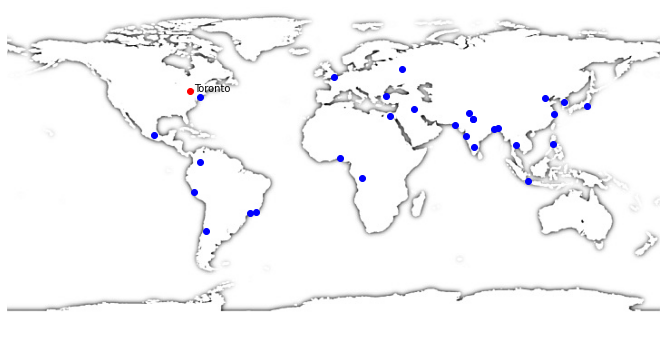

In [11]:
import matplotlib.pyplot as plt
import time as time
import IPython.display as ip
#import drawSvg


WIDTH = 720 # image (world.jpg) width
HEIGHT = 360 # image height
DPI = 60 # display image at this dots-per-inch resolution



# Convert a latitude and longitude to pixel locations.
# WIDTH & HEIGHT should be defined to be the size of the image (in pixels)
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)

# start by looping over the list, first need to read cities_population.txt
citiesFile = open("cities_population.txt", "r")
citiesPop = citiesFile.readlines()
topThirty = []

# make a list of lists
for i in range(30):
    topThirty.append(citiesPop[i].split(", "))

# can't get it to actually save all dots at once without doing something
# goofy and digging in more to documentation for stuff we haven't learned in this 
# course/206a. I can either do a still image with all of them or an animation with one
# at a time. No patience to solve the animation especially due to minimal guidance
# from the assignment description.

# If I wanted to make a still image of all of them, I would move the creation of the 
# image back to the top (outside of the loop) and only do the plotting of the thirty 
# points in this section below. 

for i in range(len(topThirty)):
    # save the long/lat for later
    imgx, imgy = longlat_to_pixel(float(topThirty[i][2]), float(topThirty[i][3].strip()))
    # pull in the image
    img = plt.imread("world.jpg")
    # size it 
    plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
    plt.imshow(img) # Display the image
    plt.axis('off')
    #plt.plot(120, 100, 'bo') # plot one blue data point
    # plot the dot for the city
    plt.plot(imgx, imgy, 'ro')
    # annotate it 
    plt.annotate(str(topThirty[i][0]), xy=(imgx + 5, imgy))
    
    for j in range(0, i):
        # save the long/lat for later
        imgx, imgy = longlat_to_pixel(float(topThirty[j][2]), float(topThirty[j][3].strip()))
        # pull in the image
        #img = plt.imread("world.jpg")
        # size it 
        #plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
        #plt.imshow(img) # Display the image
        #plt.axis('off')
        #plt.plot(120, 100, 'bo') # plot one blue data point
        # plot the dot for the city
        plt.plot(imgx, imgy, 'bo')
    #ip.clear_output(wait=True)
    # wait
    plt.show()
    time.sleep(.5) 
    ip.clear_output(wait=True)
    
#plt.show()

#print(citiesPop)
#print(topThirty)

citiesFile.close()

# checking outputs
#print(citiesPop)